# Perceptron Usando Numpy 

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# Data

X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]], dtype=float)

Y = np.array([0,1,1,1], dtype=float)

In [61]:
# Hyperparameters

lr = 0.1  # Learning Rate
max_epochs = 50 # Safety Cap

In [62]:
# Initialization

rng = np.random.default_rng(0) # So that the result is always the same
w = rng.normal(0, 0.01, size=X.shape[1]) # Small random weights
b = 0 # Bias

def step(z: float) -> float:
    return 1.0 if z >= 0 else 0.0

error_history = [] # Misclassifications per epoch

In [63]:
# Training rule

for e in range(max_epochs):
    errors = 0
    for xi, target in zip(X, Y):
        z = np.dot(xi, w) + b
        y_hat = step(z)
        update = lr * (target- y_hat)
        w += update * xi
        b += update
        errors += int(update != 0.0)
    error_history.append(errors)
    if errors == 0:
        break

In [64]:
# Evaluate with training set

preds = np.array([step(np.dot(xi, w) + b) for xi in X])

print(f"Learned weights: {w}")
print(f"Learned bias: {b}")
print(f"Predictions on AND inputs: {preds.astype(int)}")
print(f"Errors per epoch: {error_history}")

Learned weights: [0.1012573  0.19867895]
Learned bias: -0.1
Predictions on AND inputs: [0 1 1 1]
Errors per epoch: [2, 2, 2, 1, 0]


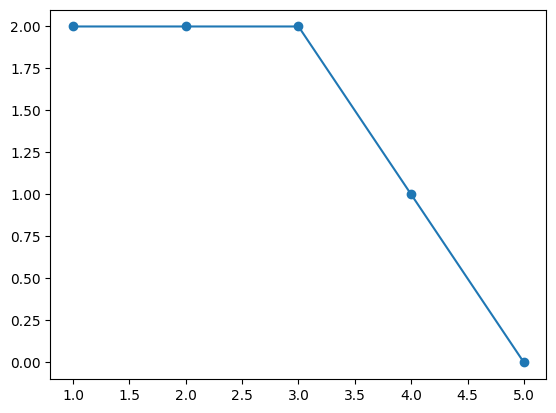

In [66]:
# Plot learning curve

plt.figure()
plt.plot(range(1, len(error_history) + 1), error_history, marker="o")
plt.show()